# Lab 4. Probabilistic Inference
# Task 4.2 Diabetes Diagnosis Using Naïve Bayes 
## Problem Descriptions
Describe the problem here...
Given the clinical parameters of the patients, we will use this data to build a model to predict whether the patient suffered from a certain desease or the progression level of a desease.  The model that would be used will be based upon the Baseyian Theorems.  This model will allow us to use mutlitple feautes to predict the hypothesis.  
Bayes Theorem can be written as;
  *  P(A|B) = P(B|A).P(A)/P(B) ...eq 1
  *  P(A|B) is the posterity probability of A given B.
  *  P(B|A) is the posterity probability of B given A. 
##Data 
This data set is imported -  datasets.load_diabetes()

##Evaluation
A confusiona matrix will be used to evaluate the model.

## Features
  *  age, 
  *  gender, 
  *  height,
  *  weight,
  *  body test data (blood sugar, heart rate, lipoproteins etc) and symptoms
(fever, headache etc),


## Implementation and Results

In [ ]:
!pip install sklearn
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

# import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import patches
import math

# Model 1


In [ ]:
diabetes = datasets.load_diabetes()
# X = diabetes.data[:,[2,3,9]]
X = diabetes.data
Y = [math.floor(x/150) for x in diabetes.target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# split the dataset into training (80%) and testing (20%), and fit the data into the naive Bayes model
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Use the naive Bayes model we just built to predict on the testing set, and display the results.
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Prior:\n", nb.class_prior_)
print("Mean:\n", nb.theta_)
print("Variance:\n", nb.sigma_)


Accuracy: 0.6216216216216216
Confusion Matrix:
 [[45 23  0]
 [13 24  4]
 [ 0  2  0]]
Prior:
 [0.51359517 0.45015106 0.03625378]
Mean:
 [[-0.00790776 -0.00034506 -0.02209417 -0.01503387 -0.00776075 -0.00680411
   0.01722707 -0.01712262 -0.02355361 -0.01384513]
 [ 0.01003954 -0.00049935  0.02126017  0.01957711  0.00787802  0.00462754
  -0.01552912  0.01509551  0.02537789  0.01273859]
 [ 0.00871289  0.0189062   0.08172555  0.03937361 -0.00260092 -0.00674178
  -0.02990151  0.02508358  0.03867242  0.04206925]]
Variance:
 [[0.00220752 0.00226024 0.00131781 0.00172911 0.00211623 0.00204786
  0.00262479 0.00168602 0.00167869 0.00185991]
 [0.00221559 0.00225918 0.00177445 0.00236701 0.00238873 0.00219965
  0.0013111  0.00211945 0.00194367 0.00219049]
 [0.00258729 0.00201916 0.00195694 0.00223131 0.00097538 0.00056118
  0.00115062 0.00139006 0.00125787 0.00160835]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


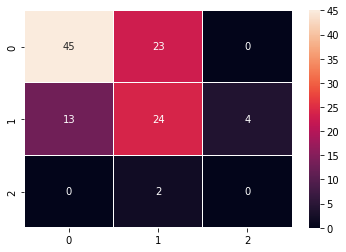

In [ ]:
#Create a Confusion Matrix heatmap from the above data
import seaborn as sns
sns.heatmap(cm, annot=True, linewidths = 0.01)

# Model 2

In [ ]:
X = diabetes.data[:,[2,3,9]]
# X = diabetes.data
Y = [math.floor(x/150) for x in diabetes.target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# split the dataset into training (80%) and testing (20%), and fit the data into the naive Bayes model
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Use the naive Bayes model we just built to predict on the testing set, and display the results.
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Prior:\n", nb.class_prior_)
print("Mean:\n", nb.theta_)
print("Variance:\n", nb.sigma_)

Accuracy: 0.6576576576576577
Confusion Matrix:
 [[47 16  0]
 [19 25  0]
 [ 1  2  1]]
Prior:
 [0.52870091 0.44108761 0.03021148]
Mean:
 [[-0.01929983 -0.01769115 -0.01286495]
 [ 0.02030379  0.01888539  0.01673904]
 [ 0.07107317  0.03357812  0.05194127]]
Variance:
 [[0.00140396 0.00156448 0.00170736]
 [0.00186497 0.00230557 0.00221382]
 [0.0012458  0.00267459 0.00154345]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


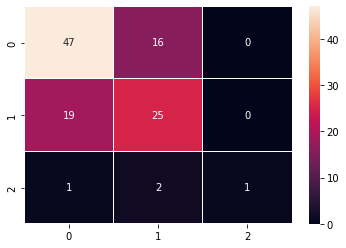

In [ ]:
#Create a Confusion Matrix heatmap from the above data
import seaborn as sns
sns.heatmap(cm, annot=True, linewidths = 0.01)

## Discussions

In this task, we built a model using Bayesian method for predicting the likelhood of someone having diabetes.  In both cases above we used the same dataset, however, in the second model we did not use all of the features for prediction.  There was an observed higher accuracy value for the second model that did not use all of the features.  In the first model, all of the features were used in the building of the model.  Highly correlated features (having the same values) would produce lower accuracy figures. 

From a quick glance of the heatmap we can see:
1.  The diagonal elements represents the total correct values predicted per class.  Model 1 total correct values is not = to model 2 values.
2.  From the heat map we can also deduce that the 3 classes had different performance for both model as we can observe different colors used for each of them.
3.  If one of the features has mising values or outliers, then, this can also account for the difference in acuracy between the two models.  
4.  Model 2 also had higher values across all 3 classes for both accuracy and Precision.  





